In [6]:
import numpy as np
import pandas as pd

In [69]:
# Cargar el archivo .npy
datos = np.load('proyecto_training_data.npy')
datosdf = pd.DataFrame(datos)
datosdf.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

datosdf

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [74]:
tamanio =len(datosdf) 
# Separar los datos entrenamiento (80%) 
tam_entrenamiento = int(0.8 * tamanio)

# validación y pruebas (20%)
tam_validacionpruebas = tamanio - tam_entrenamiento

datos_entrenamiento = datos[:tam_entrenamiento]
datos_validacionpruebas = datos[tam_entrenamiento:]

# Separar los datos de validación y pruebas en mitades iguales
tam_validacion = int(0.5 * len(datos_validacionpruebas))

datos_validacion = datos_validacionpruebas[:tam_validacion]
datos_pruebas = datos_validacionpruebas[tam_validacion:]

DFEntrenamiento = pd.DataFrame(datos_entrenamiento)
DFEntrenamiento.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

DFValidacion = pd.DataFrame(datos_validacion)
DFValidacion.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

DFPruebas = pd.DataFrame(datos_pruebas)
DFPruebas.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

print("Tamaño Total")
print(tamanio)
print("Tamaño entrenamiento 80%")
print(tam_entrenamiento)
print("Tamaño validacion 10% y pruebas 10% (20%) ")
print(tam_validacionpruebas)
print("------------------------------")
print("Datos de entrenamiento:")
print(DFEntrenamiento)
print("Datos de validación:")
print(DFValidacion)
print("Datos de pruebas:")
print(DFPruebas)

Tamaño Total
1460
Tamaño entrenamiento 80%
1168
Tamaño validacion 10% y pruebas 10% (20%) 
292
------------------------------
Datos de entrenamiento:
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
116

In [75]:
Media = DFEntrenamiento.mean(axis=0)
ValorMaximo = DFEntrenamiento.max(axis=0)
ValorMinimo = DFEntrenamiento.min(axis=0)
Rango = DFEntrenamiento.ndim
DesviacionEstandar = DFEntrenamiento.std(axis=0)

Res = ({'Media':pd.Series(Media,dtype=float),'Valor Maximo':pd.Series(ValorMaximo,dtype=float), 
        'Valor Minimo':pd.Series(ValorMinimo,dtype=float), 'Rango':pd.Series(Rango,dtype=float),
       'Desviacion Estandar':pd.Series(DesviacionEstandar,dtype=float)})
dfRes = pd.DataFrame(Res)
dfRes

,Media,Valor Maximo,Valor Minimo,Rango,Desviacion Estandar
0,NaN,NaN,NaN,2.0,NaN
1stFlrSF,1156.323630,3228.0,334.0,NaN,373.780374
LotFrontage,69.946985,313.0,21.0,NaN,23.478161
OverallQual,6.101027,10.0,1.0,NaN,1.378025
SalePrice,180590.277397,755000.0,34900.0,NaN,78815.697902
TotRmsAbvGrd,6.485445,14.0,2.0,NaN,1.609141
YearBuilt,1971.451199,2010.0,1875.0,NaN,29.951707


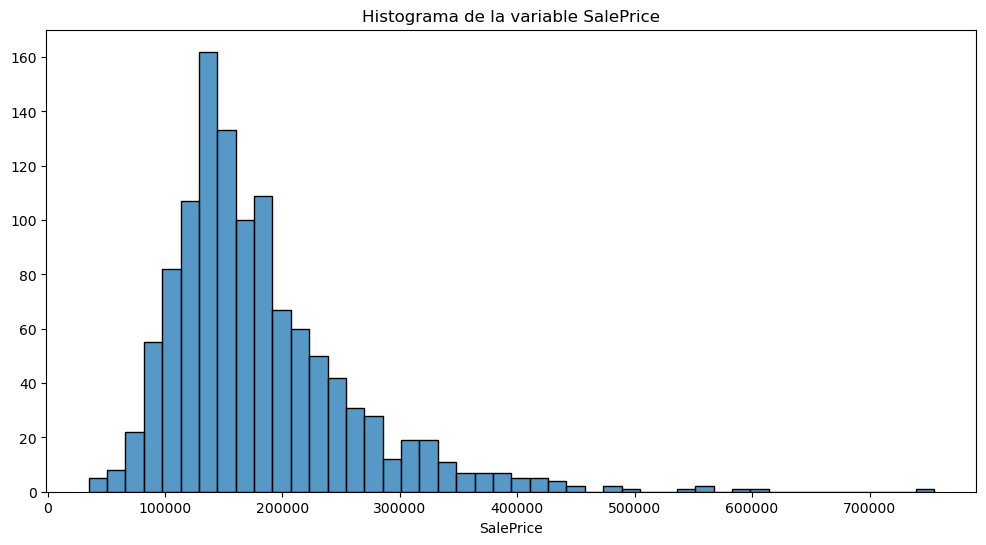

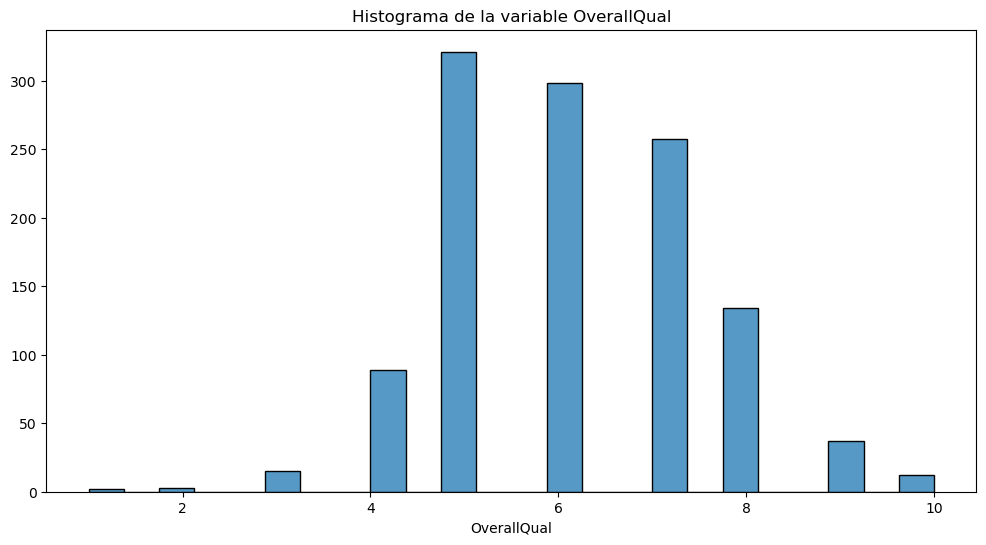

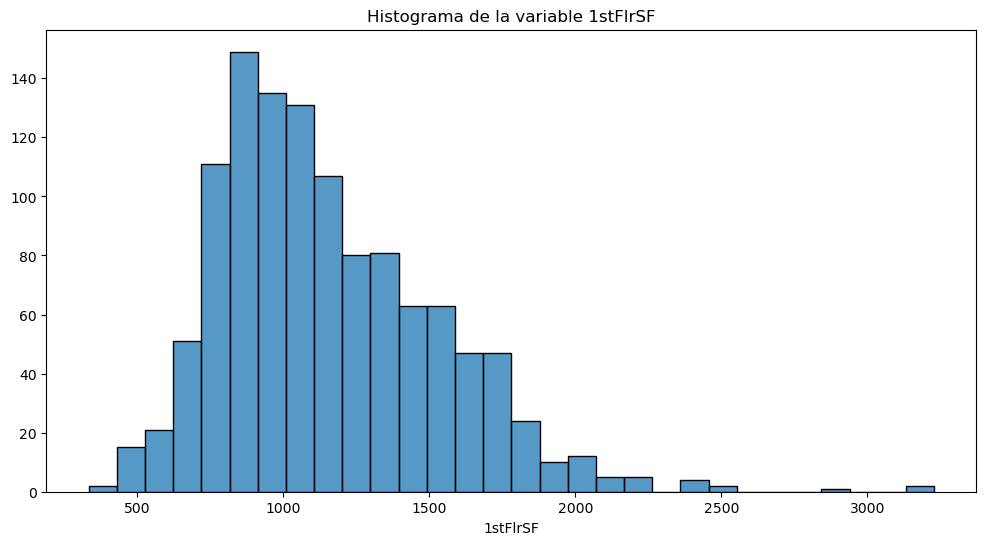

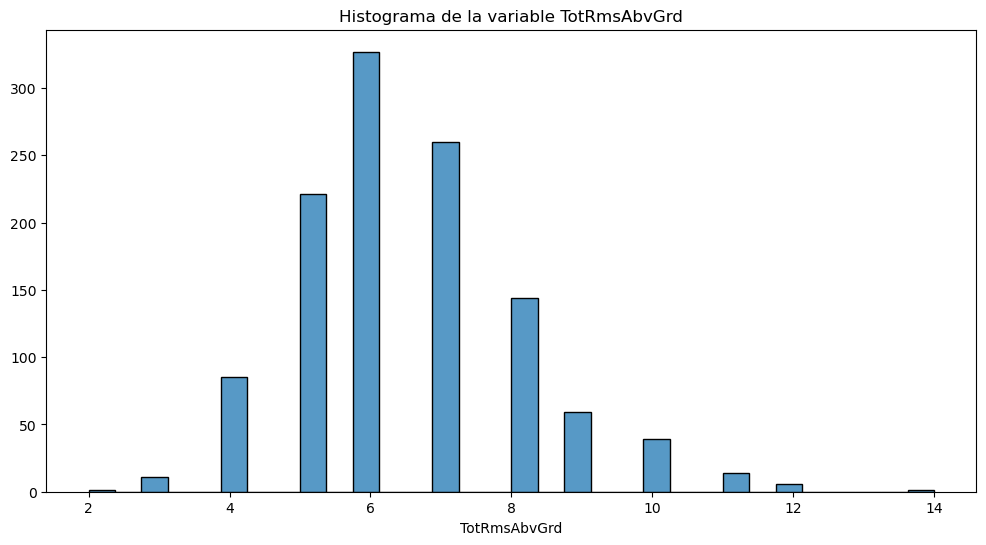

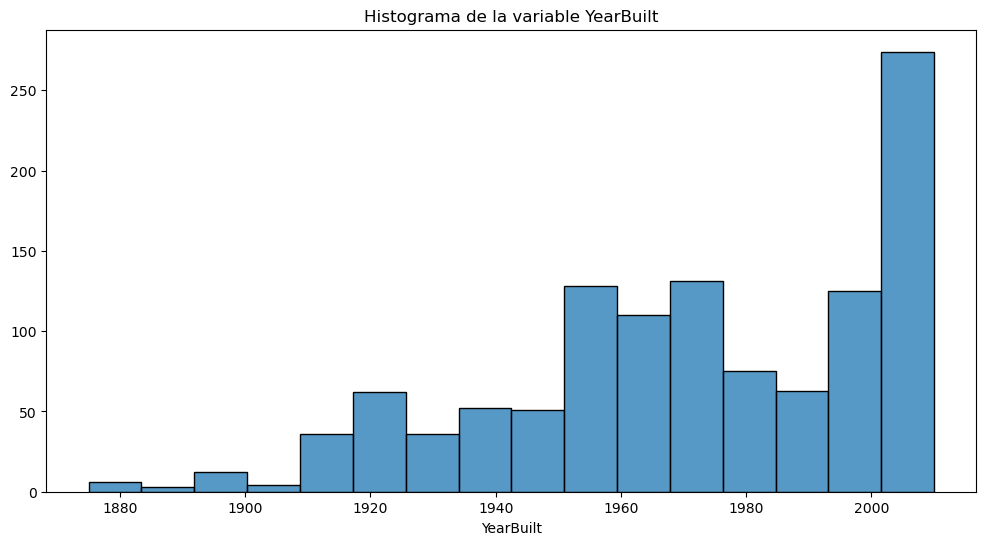

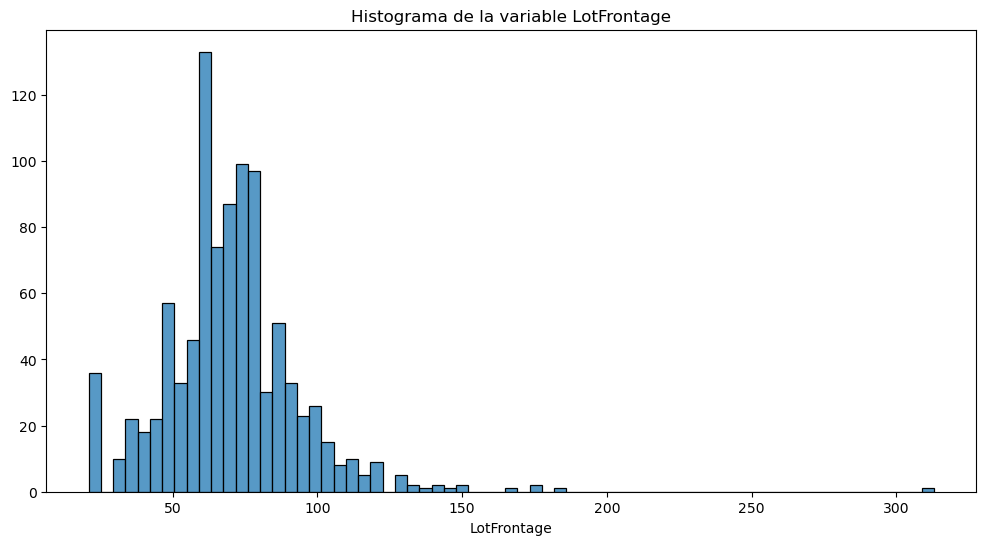

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in DFEntrenamiento.columns.values:
    
    plt.figure(figsize=(12, 6))
    sns.histplot(DFEntrenamiento[col])
    
    plt.title('Histograma de la variable ' + str(col))
    plt.xlabel(col)
    plt.ylabel('')
    
    plt.show()